In [14]:
%load_ext lab_black

experiments/synthetic_datasets/datasets/aeab3ab79c15b777ef6570175a5fce74.json


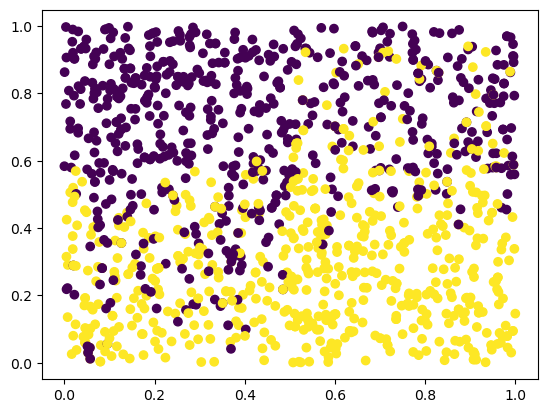

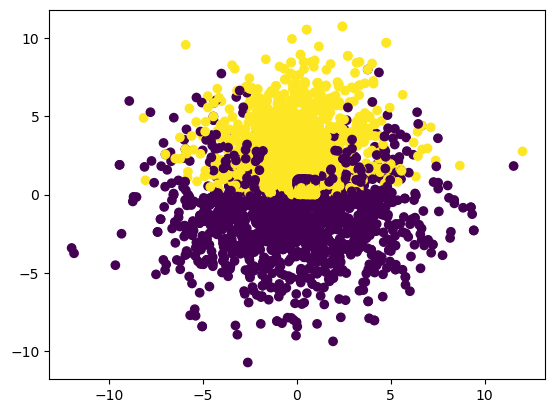

In [6]:
from experiments.synthetic_datasets.common import load_dataset
from pathlib import Path
import matplotlib.pyplot as plt

for ds_f in Path("experiments/synthetic_datasets/datasets").iterdir():
    ds = load_dataset(ds_f)
    plt.scatter(*ds.X.T, c=ds.y)
    if "fce74" in str(ds_f):
        print(ds_f)
        plt.show()

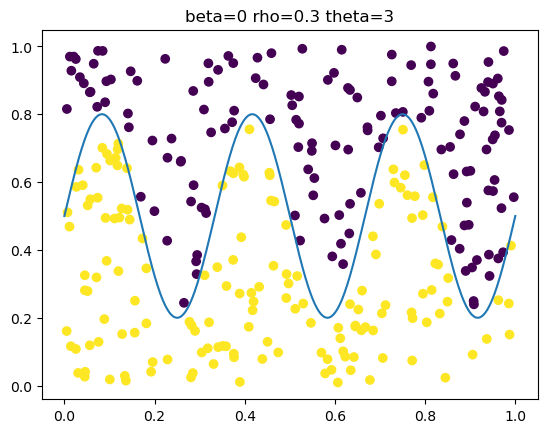

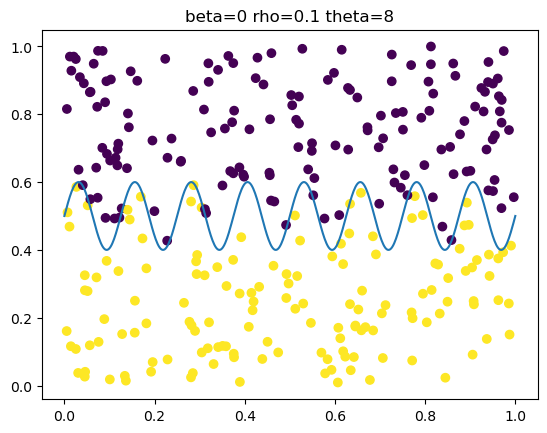

In [3]:
def get_decision_function(beta, rho, theta):
    # wave-like function to create a margin. Can tune difficulty of classification by changing parameters
    return lambda x:1 / (1 + np.exp(-beta * (x - 0.5))) + rho * np.sin(2 * np.pi * theta * x)

confs = [
    #(1,  .2, 10),
    #(95, .2, 10),
    #(1, 1, 1)
    (0, .3, 3),
    (0, .1, 8)
]

for b,r,t in confs:
    x_df = np.linspace(0, 1, 500)
    y_df = get_decision_function(b,r,t)(x_df)
    plt.plot(x_df, y_df)

    ds = dataset_from_custom_function(b, r, t)
    plt.scatter(*ds.X.T, c=ds.y)
    plt.title(f"beta={b} rho={r} theta={t}")
    plt.show()

In [9]:
import pandas as pd

data = []
for ds_f in Path("experiments/datasets").iterdir():
    ds = load_dataset(ds_f)
    data.append({
        "dataset": ds.id,
        "F1":ds.F1[1],
        "N1": ds.N1,
        "C1": ds.C1,
        "C2": ds.C2,
        "params":ds.params
    })

pd.DataFrame(data)

,dataset,F1,N1,C1,C2,params
0,11821f8cbfaa0b6a1675346f98322ead,0.414743,0.090301,0.283455,0.536353,"{'beta': 0, 'rho': 0.1, 'theta': 8, 'populatio..."
1,2b8324542032591c520cf2bf38ce1313,0.795529,0.086957,0.540619,0.787635,"{'beta': 0, 'rho': 0.3, 'theta': 3, 'populatio..."
2,ff89c17b0ee181abd72e691a10b27bf9,0.275941,0.120000,0.000802,0.002220,"{'beta': 0, 'rho': 0.1, 'theta': 8, 'n': 300, ..."
3,c1fecee4a9fffdc9e2e0db4dca078534,0.656935,0.130435,0.540619,0.787635,"{'beta': 1, 'rho': 0.2, 'theta': 10, 'populati..."
4,3cd89dab74b6d2f7f00cd48ba8202e51,0.224082,0.016667,0.000000,0.000000,"{'n': 300, 'cluster_std': 2, 'centers': 2, 'te..."
5,fe7a1e846cfad2c05d754de0c5969ea3,0.551699,0.063545,0.540619,0.787635,"{'beta': 0, 'rho': 0.1, 'theta': 8, 'populatio..."
6,6340ead3f8a9ea762eaf5c2132fc757a,0.505008,0.130000,0.000802,0.002220,"{'beta': 0, 'rho': 0.3, 'theta': 3, 'n': 300, ..."
7,984b0f883d0210b869830bb4a1e6abdf,0.677668,0.110368,0.283455,0.536353,"{'beta': 0, 'rho': 0.3, 'theta': 3, 'populatio..."
8,4866a56c176db9624e6d8bb02f2de8e1,0.492562,0.186667,0.000802,0.002220,"{'beta': 95, 'rho': 0.2, 'theta': 10, 'n': 300..."
9,83fcad681055b44f31f127af2b928db5,0.596265,0.150000,0.118709,0.275862,"{'beta': 0, 'rho': 0.3, 'theta': 3, 'populatio..."


In [13]:
%load_ext lab_black

/home/anto/anaconda3/envs/budget-svm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anto/anaconda3/envs/budget-svm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anto/anaconda3/envs/budget-svm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'n_samples': 1000,
 'n_features': 10,
 'score': 0.488,
 'complexities': {'f1': 0.962,
  'f1v': 0.505,
  'f2': 0.064,
  'f3': 0.968,
  'f4': 0.82,
  'l1': 0.095,
  'l2': 0.105,
  'l3': 0.105,
  'n1': 0.057,
  'n2': 0.81,
  'n3': 0.115,
  'n4': 0.091,
  't1': 0.466,
  'lsc': 0.982,
  'density': 0.978,
  'clsCoef': 0.622,
  'hubs': 0.878,
  't2': 0.01,
  't3': 0.008,
  't4': 0.8,
  'c1': 0.515,
  'c2': 0.769},
 'n_classes': 2,
 'classes': 2,
 'prior_probability': array([0.105, 0.895])}

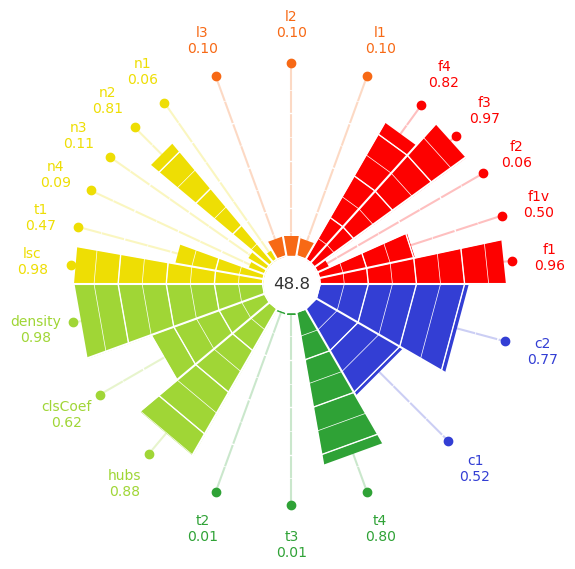

In [36]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=9,
    n_redundant=1,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=7,
    class_sep=1.0, # Larger values spread out the clusters/classes and make the classification task easier.
    weights=(0.1, 0.9), # class proportion
    flip_y=.1, # The fraction of samples whose class is assigned randomly.
    hypercube=True,
    shuffle=True,
    random_state=42,
)

# ax = plt.axes(projection="3d")
# ax.scatter3D(*X.T, c=y)

cc = px.ComplexityCalculator()
cc.fit(X, y)

fig = plt.figure(figsize=(7, 7))
cc.plot(fig, (1, 1, 1))

cc.report()

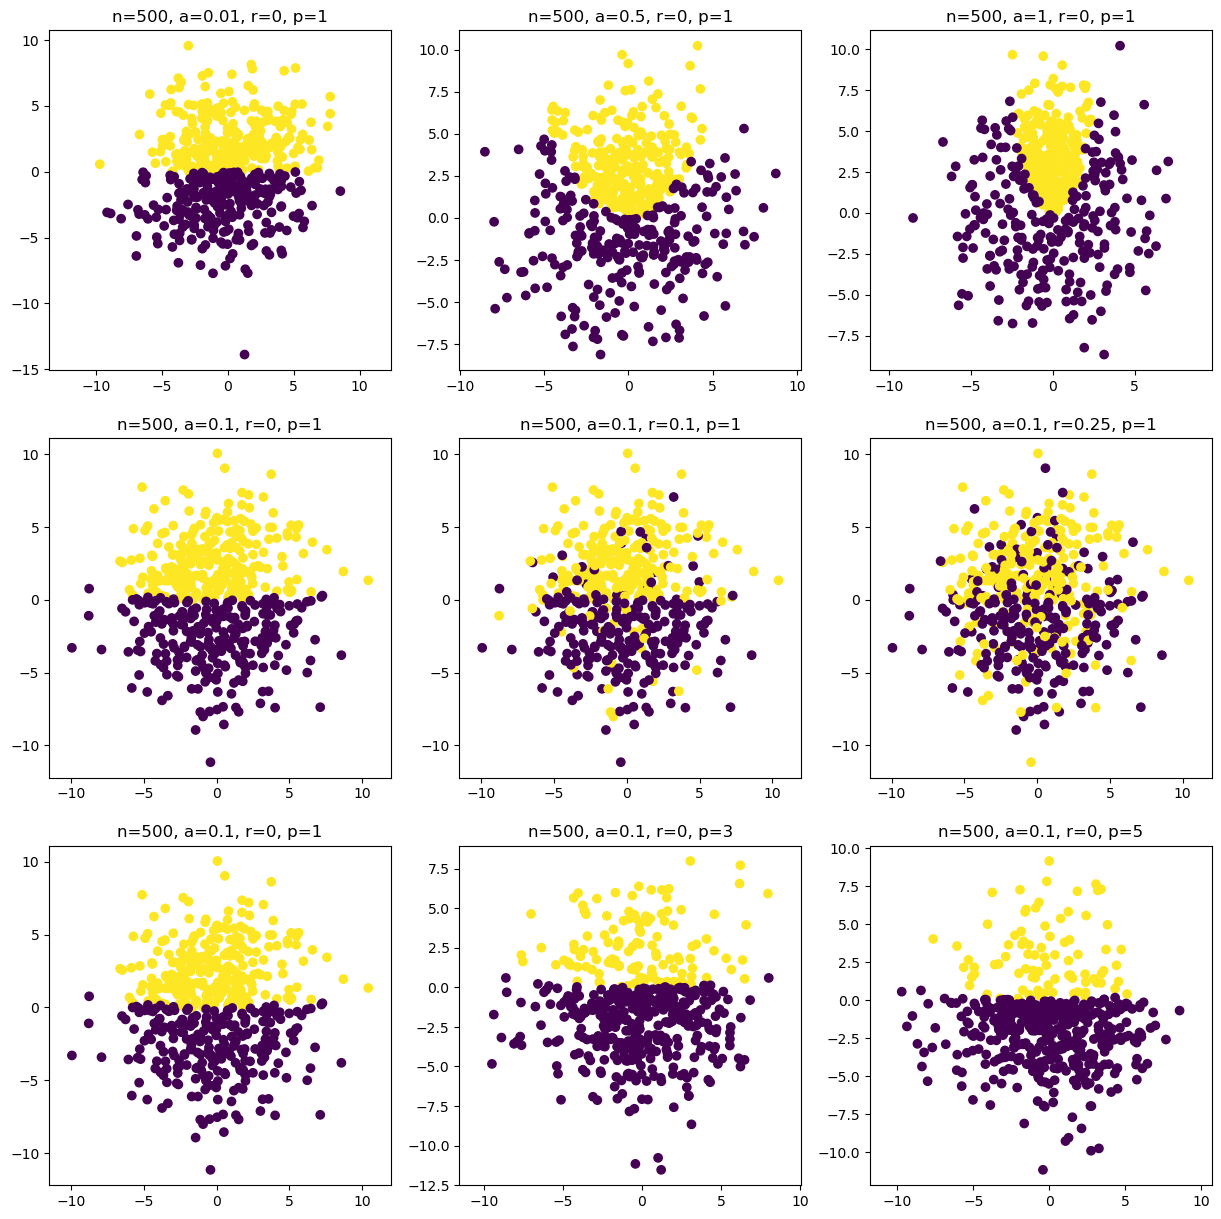

In [5]:
from numpy.random import default_rng
import matplotlib.pyplot as plt
import numpy as np


def get_labeling_function(alpha):
    def labeling_fn(iterable, rng):
        y = []
        for x1, x2 in iterable:
            yval = x2 - (alpha * x1) ** 2
            y.append(1 if yval > 0 else -1)

        return np.array(y)

    return labeling_fn


def flip_class(y, r, rng):
    positive_indices = np.where(y == 1)[0]
    negative_indices = np.where(y == -1)[0]

    flip_size = int(r * len(positive_indices))

    pos_flip_idx = rng.choice(positive_indices, size=flip_size, replace=False)
    neg_flip_idx = rng.choice(negative_indices, size=flip_size, replace=False)

    y[pos_flip_idx] = -y[pos_flip_idx]
    y[neg_flip_idx] = -y[neg_flip_idx]
    return y


def get_pacman_dataset(n=300, a=1, r=0, p=1, dim=2, gamma=10, seed=42):
    rng = default_rng(seed)

    mean = np.zeros(dim)
    cov = np.eye(dim) * gamma

    population = rng.multivariate_normal(mean, cov, n * 10, check_valid="raise")

    lfn = get_labeling_function(a)
    y = lfn(population, rng)

    x_pos = population[np.where(y == 1)]
    x_neg = population[np.where(y == -1)]

    num_pos = int(n / (p + 1))
    num_neg = n - num_pos

    X = np.concatenate(
        [
            rng.choice(x_pos, size=num_pos, replace=False),
            rng.choice(x_neg, size=num_neg, replace=False),
        ],
    )

    y = lfn(X, rng)
    y = flip_class(y, r, rng)

    return X, y


fig, axs = plt.subplots(3, 3, figsize=(15, 15))
flat_axs = axs.flat
for n, a, r, p in zip(
    [500] * 9,
    [0.01, 0.5, 1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0, 0, 0, 0, 0.1, 0.25, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 3, 5],
):
    ax = next(flat_axs)
    X, y = get_pacman_dataset(n=n, a=a, r=r, p=p)
    ax.title.set_text(f"n={n}, a={a}, r={r}, p={p}")
    ax.scatter(*X.T, c=y)
    ax.axis("equal")

/home/anto/anaconda3/envs/budget-svm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anto/anaconda3/envs/budget-svm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anto/anaconda3/envs/budget-svm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'n_samples': 300,
 'n_features': 2,
 'score': 0.522,
 'complexities': {'f1': 0.927,
  'f1v': 0.826,
  'f2': 0.678,
  'f3': 0.983,
  'f4': 0.977,
  'l1': 0.265,
  'l2': 0.25,
  'l3': 0.25,
  'n1': 0.153,
  'n2': 0.621,
  'n3': 0.32,
  'n4': 0.253,
  't1': 0.47,
  'lsc': 0.987,
  'density': 0.87,
  'clsCoef': 0.331,
  'hubs': 0.711,
  't2': 0.007,
  't3': 0.007,
  't4': 1.0,
  'c1': 0.189,
  'c2': 0.4},
 'n_classes': 2,
 'classes': 2,
 'prior_probability': array([0.75, 0.25])}

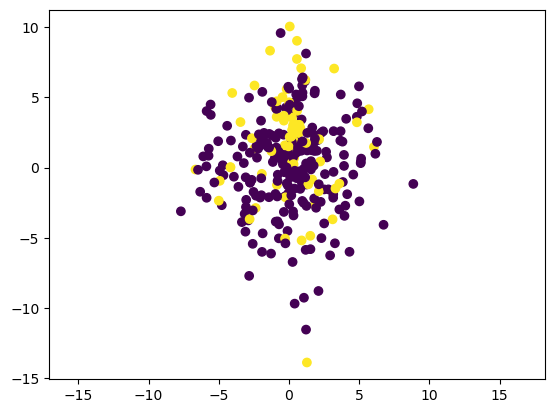

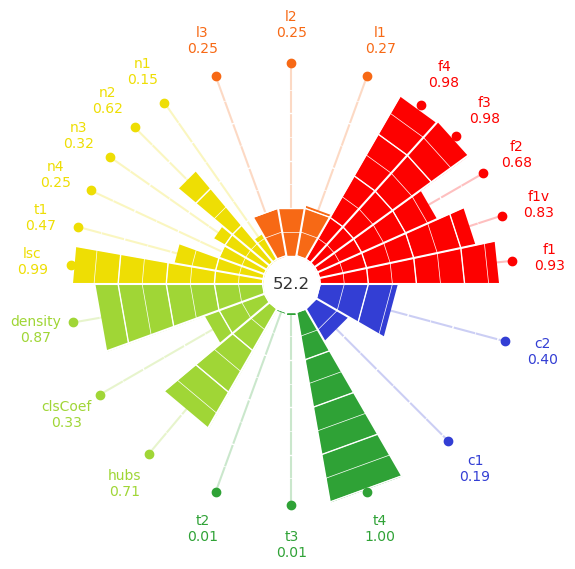

In [10]:
import problexity as px

X, y = get_pacman_dataset(n=300, a=2, r=.5, p=3)
plt.scatter(*X.T, c=y)
plt.axis("equal")

y[y == -1] = 0
cc = px.ComplexityCalculator()
cc.fit(X, y)


fig = plt.figure(figsize=(7, 7))
cc.plot(fig, (1, 1, 1))

cc.report()

In [3]:
import pickle

with open("experiments/results/models/9ee13843-77ab-46f3-9182-9d443e45d6fb.pkl", "rb") as fp:
    model = pickle.load(fp)

model.__repr__

'SVM(kernel=GaussianKernel(sigma=0.1), budget=44)'